In [101]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt 
import warnings


In [102]:
def distance(x1, y1, x2, y2):
    return np.math.sqrt(((x1 - x2) ** 2) + ((y1 - y2) ** 2))

*Plotting the accuracy of the system*

In [103]:
directory = 'testData'
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        print('---------------------------------------------------------')
        print(f)
        print('---------------------------------------------------------\n')
        df = pd.read_csv(f)
        print(df.head())

---------------------------------------------------------
testData/data0.csv
---------------------------------------------------------

   frameNumber  windowSize  XYError  timeToFuture          time        fps  \
0            0           4       10             1  1.657587e+09  27.880430   
1            1           4       10             1  1.657587e+09  11.140812   
2            2           4       10             1  1.657587e+09  22.638262   
3            3           4       10             1  1.657587e+09  22.281328   
4            4           4       10             1  1.657587e+09  22.727442   

   currentCenterX  currentCenterY  leftShoulderX  leftShoulderY  \
0             238             240            256            224   
1             239             246            257            224   
2             240             244            260            224   
3             242             244            262            224   
4             245             244            265            

Prediction accuracy v/s Radius from actual location


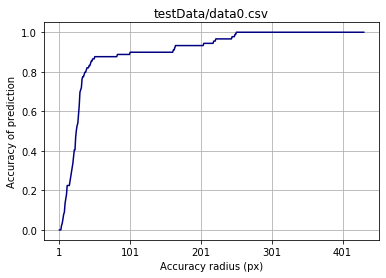

Accuracy at 50px radius : 0.8764044943820225


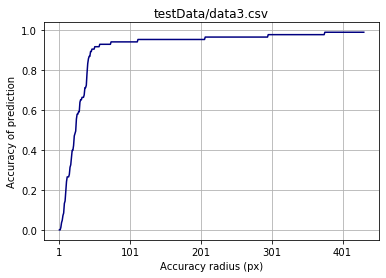

Accuracy at 50px radius : 0.9156626506024096


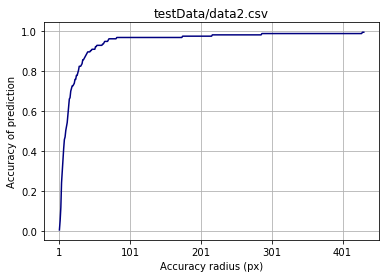

Accuracy at 50px radius : 0.9084967320261438


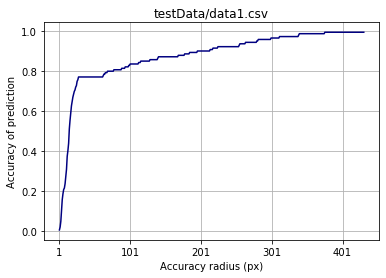

Accuracy at 50px radius : 0.7697841726618705


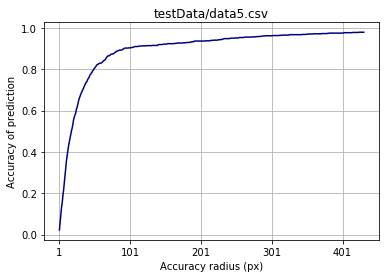

Accuracy at 50px radius : 0.8072417465388712


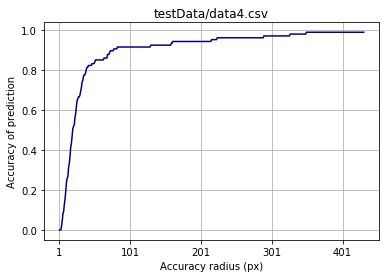

Accuracy at 50px radius : 0.8425925925925926


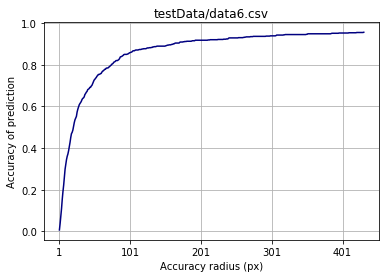

Accuracy at 50px radius : 0.7296296296296296


In [104]:
# mapping accuracy rates based on radii from actual locations
thresholdRadii = list(range(1, 432)) # 432 being the smaller of the two window dimensions
accuracies50px = []

directory = 'testData'
print('Prediction accuracy v/s Radius from actual location')
for filename in os.listdir(directory):
    
    f = os.path.join(directory, filename)
    
    if os.path.isfile(f):
        
        df = pd.read_csv(f)
        accuracyDict = dict()
        # frameGap = df['timeToFuture'].mean() * df['fps'].mean()

        for thresholdRadius in thresholdRadii:

            accuratePred = []
            for j in range(1, len(df)):

                x1 = df['currentCenterX'][j]
                y1 = df['currentCenterY'][j]
                x2 = df['predictedX'][j - 1]
                y2 = df['predictedY'][j - 1]

                if distance(x1, y1, x2, y2) < thresholdRadius:
                    accuratePred.append(True)
                else:
                    accuratePred.append(False)

                accuracy = accuratePred.count(True) / len(accuratePred)

            accuracyDict[str(thresholdRadius)] = accuracy

        accuracySeries = pd.Series(accuracyDict)
        ax = accuracySeries.plot(colormap='jet', grid=True, title=f)
        ax.set_xlabel("Accuracy radius (px)")
        ax.set_ylabel("Accuracy of prediction")
        plt.show()
        print('Accuracy at 50px radius : ' + str(accuracySeries[50]))
        accuracies50px.append((f, accuracySeries[50]))

--------------------------------------------------------------------
Accuracy data for all test cases at 50px radius from actual location
--------------------------------------------------------------------
Mean accuracy = 0.8356
Standard deviation = 0.0652
Variance = 0.0042


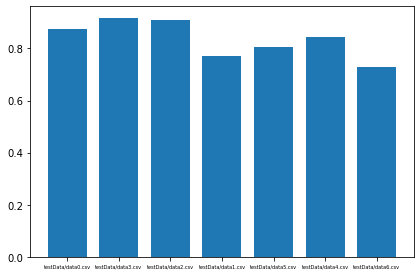

In [105]:
# visualizing the accuracy of prediction at 50 pixel radius for all test cases
accuracies50px = dict(accuracies50px)

print('--------------------------------------------------------------------')
print('Accuracy data for all test cases at 50px radius from actual location')
print('--------------------------------------------------------------------')

plt.xticks(fontsize=5)
plt.tight_layout()
plt.bar(accuracies50px.keys(), accuracies50px.values(), 0.755)

print('Mean accuracy = ' + str(np.mean(list(accuracies50px.values())))[0:6])
print('Standard deviation = ' + str(np.std(list(accuracies50px.values())))[0:6])
print('Variance = ' + str(np.var(list(accuracies50px.values())))[0:6])

*Information gain testing for decision tree modelling*

In [106]:
# mapping accuracy rates based on radii from actual locations
#thresholdRadii = list(range(1, 432)) # 432 being the smaller of the two window dimensions
thresholdRadii = [50]
accuracies50px = []
listdf = []

directory = 'testData'
print('Prediction accuracy v/s Radius from actual location')
for filename in os.listdir(directory):
    
    f = os.path.join(directory, filename)
    
    if os.path.isfile(f):
        
        df = pd.read_csv(f)
        accuracyDict = dict()
        # frameGap = df['timeToFuture'].mean() * df['fps'].mean()

        for thresholdRadius in thresholdRadii:

            accuratePred = []
            for j in range(1, len(df)):

                x1 = df['currentCenterX'][j]
                y1 = df['currentCenterY'][j]
                x2 = df['predictedX'][j - 1]
                y2 = df['predictedY'][j - 1]

                if distance(x1, y1, x2, y2) < thresholdRadius:
                    accuratePred.append(True)
                else:
                    accuratePred.append(False)

                accuracy = accuratePred.count(True) / len(accuratePred)

            accuracyDict[str(thresholdRadius)] = accuracy

        df = df.dropna()
        accuratePred = ['True'] + accuratePred
        df['accuratePred'] = accuratePred

        err = 15
        df['angleOfApproach'] = df["angleOfApproach"].apply(lambda val: 4 if (val > (90-err) and val < (90+err)) else 3 if (val > (0-err) and val <(0+err)) else 2 if (val > 0 and val <90) else 1 if (val > 90 and val < 180) else 5)
        df['XFrameSpeed'] = df["XFrameSpeed"].apply(lambda val: 3 if (val > (0 - err) and val < (0 + err)) else 1 if (val > 0) else 2)
        df['YFrameSpeed'] = df["YFrameSpeed"].apply(lambda val: 3 if (val > (0 - err) and val < (0 + err)) else 1 if (val > 0) else 2)

        df.pop('frameNumber')
        df.pop('windowSize')
        df.pop('XYError')
        df.pop('timeToFuture')
        df.pop('time')
        df.pop('fps')
        df.pop('leftShoulderX')
        df.pop('leftShoulderY')
        df.pop('rightShoulderX')
        df.pop('rightShoulderY')
        df.pop('occupiedHeights')
        df.pop('currentCenterX')
        df.pop('currentCenterY')
        df.pop('predictedX')
        df.pop('predictedY')

        listdf.append(df)

        #accuracySeries = pd.Series(accuracyDict)
        #ax = accuracySeries.plot(colormap='jet', grid=True, title=f)
        #ax.set_xlabel("Accuracy radius (px)")
        #ax.set_ylabel("Accuracy of prediction")
        #plt.show()
        #print('Accuracy at 50px radius : ' + str(accuracySeries[50]))
        #accuracies50px.append((f, accuracySeries[50]))

bigdf = pd.concat(listdf, axis=0)
bigdf = bigdf.dropna()
print(bigdf.shape)
bigdf.head()

Prediction accuracy v/s Radius from actual location
(2328, 4)


,angleOfApproach,XFrameSpeed,YFrameSpeed,accuratePred
0,1,1,1,True
1,1,3,3,True
2,1,3,3,True
3,1,3,3,True
4,4,3,3,True


In [113]:
# impurity calculation
def compute_impurity(feature, impurity_criterion):
    """
    This function calculates impurity of a feature.
    Supported impurity criteria: 'entropy', 'gini'
    input: feature (this needs to be a Pandas series)
    output: feature impurity
    """
    probs = feature.value_counts(normalize=True)
    
    if impurity_criterion == 'entropy':
        impurity = -1 * np.sum(np.log2(probs) * probs)
    elif impurity_criterion == 'gini':
        impurity = 1 - np.sum(np.square(probs))
    else:
        raise ValueError('Unknown impurity criterion')
        
    return(round(impurity, 3))


# information gain calculation
def comp_feature_information_gain(df, target, descriptive_feature, split_criterion):
    """
    This function calculates information gain for splitting on 
    a particular descriptive feature for a given dataset
    and a given impurity criteria.
    Supported split criterion: 'entropy', 'gini'
    """
    
    print('target feature:', target)
    print('descriptive_feature:', descriptive_feature)
    print('split criterion:', split_criterion)
            
    target_entropy = compute_impurity(df[target], split_criterion)

    # we define two lists below:
    # entropy_list to store the entropy of each partition
    # weight_list to store the relative number of observations in each partition
    entropy_list = list()
    weight_list = list()
    
    # loop over each level of the descriptive feature
    # to partition the dataset with respect to that level
    # and compute the entropy and the weight of the level's partition
    for level in df[descriptive_feature].unique():
        df_feature_level = df[df[descriptive_feature] == level]
        entropy_level = compute_impurity(df_feature_level[target], split_criterion)
        entropy_list.append(round(entropy_level, 3))
        weight_level = len(df_feature_level) / len(df)
        weight_list.append(round(weight_level, 3))

    print('impurity of partitions:', entropy_list)
    print('weights of partitions:', weight_list)

    feature_remaining_impurity = np.sum(np.array(entropy_list) * np.array(weight_list))
    print('remaining impurity:', feature_remaining_impurity)
    
    information_gain = target_entropy - feature_remaining_impurity
    print('information gain:', information_gain)
    
    print('====================')

    return(information_gain)

In [116]:
# evaluation of the information gains from the discretized data
warnings.filterwarnings("ignore")
ig1 = comp_feature_information_gain(bigdf, 'accuratePred', 'angleOfApproach', 'entropy')
ig2 = comp_feature_information_gain(bigdf, 'accuratePred', 'XFrameSpeed', 'entropy')
ig3 = comp_feature_information_gain(bigdf, 'accuratePred', 'YFrameSpeed', 'entropy')

target feature: accuratePred
descriptive_feature: angleOfApproach
split criterion: entropy
impurity of partitions: [0.784, -0.0, 0.592, 0.545]
weights of partitions: [0.927, 0.001, 0.036, 0.036]
remaining impurity: 0.7677
information gain: 0.0042999999999999705
target feature: accuratePred
descriptive_feature: XFrameSpeed
split criterion: entropy
impurity of partitions: [0.954, 0.605, 0.725]
weights of partitions: [0.206, 0.119, 0.675]
remaining impurity: 0.757894
information gain: 0.014106000000000063
target feature: accuratePred
descriptive_feature: YFrameSpeed
split criterion: entropy
impurity of partitions: [0.897, 0.588, 0.836]
weights of partitions: [0.3, 0.419, 0.28]
remaining impurity: 0.749552
information gain: 0.022448000000000023
